# NSLKDD Dataset Cleaning

Explanation of dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

The features spreadsheet contains  the name of each feature as well as a brief description of what information each feature stores. 

In [2]:
features_df = pd.read_excel("Features.xlsx",index_col="#")
features_df.head()

,Feature,Feature Name,Description,Type,Value Type,Ranges (Between both train and test)
#,,,,,,
1,duration,Duration,Length of time duration of the connection,Continuous,Integers,0 - 54451
2,protocol_type,Protocol Type,Protocol used in the connection,Categorical,Strings,NaN
3,service,Service,Destination network service used,Categorical,Strings,NaN
4,flag,Flag,Status of the connection – Normal or Error,Categorical,Strings,NaN
5,src_bytes,Src Bytes,Number of data bytes transferred from source t...,Continuous,Integers,0 - 1379963888


The "Feature" column of this dataframe can be used to create a list of the features in the same order they appear in the dataset.

In [3]:
feature_list = features_df["Feature"].values
feature_list

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_hot_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty_level'],
      dtype=object)

Of these features the following are categorical and require encoding:
* <code>protocol_type</code>: Protocol used in the connection (3 categories)
* <code>service</code>: Destination network service used (70 categories)
* <code>flag</code>:  Status of the connection (11 categories)
* <code>class</code>: Classification of the traffic input (23 categories)

The <code>class</code> feature contains all attack types which need to be included for binary and five-class classification.

In [4]:
def target_binary_class(class_feature):
    """ Returns 1 for attack and 0 for benign network traffic """
    return int(class_feature != "normal")

In [9]:
def clean_nslkdd_dataset(data):
    # Create Binary Target Feature and drop class features
    data["target"] = np.vectorize(target_binary_class)(data["class"])
    data = data.drop("class", axis=1)

    # Drop difficulty level as it was derived 
    data = data.drop("difficulty_level", axis=1)

    # Drop num_outbounds_cmds as it always zero
    data = data.drop("num_outbound_cmds", axis=1)

    # Encode categorical features using one-hot encoding 
    dum_df = pd.get_dummies(data[["protocol_type","service","flag"]])
    data = data.drop(["protocol_type","service","flag"],axis=1)
    data = pd.concat([data,dum_df],axis=1)
    
    # Return cleaned data set
    return data 

Reading in and cleaning the train and test data

In [16]:
train_data = pd.read_csv("KDDTrain+.txt",names = feature_list)
test_data = pd.read_csv("KDDTest+.txt",names = feature_list)

train_data = clean_nslkdd_dataset(train_data)
test_data = clean_nslkdd_dataset(test_data)

Exporting clean data

In [47]:
train_data.to_csv("nslkdd_train_cleaned.csv",index=False)
test_data.to_csv("nslkdd_test_cleaned.csv",index=False)

# NSLKDD Dataset Exploratory Data Analysis

Important to see the class balance

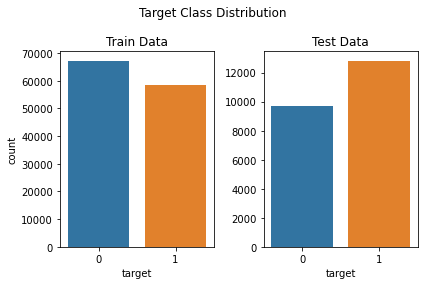

In [45]:
# Maybe include a percentage label for each bar 

fig, axs = plt.subplots(nrows=1,ncols=2)
fig.suptitle("Target Class Distribution")

sns.countplot(x="target", data = train_data, ax=axs[0])
axs[0].set_title("Train Data")

sns.countplot(x="target", data = test_data, ax=axs[1])
axs[1].set_title("Test Data")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

<AxesSubplot:>

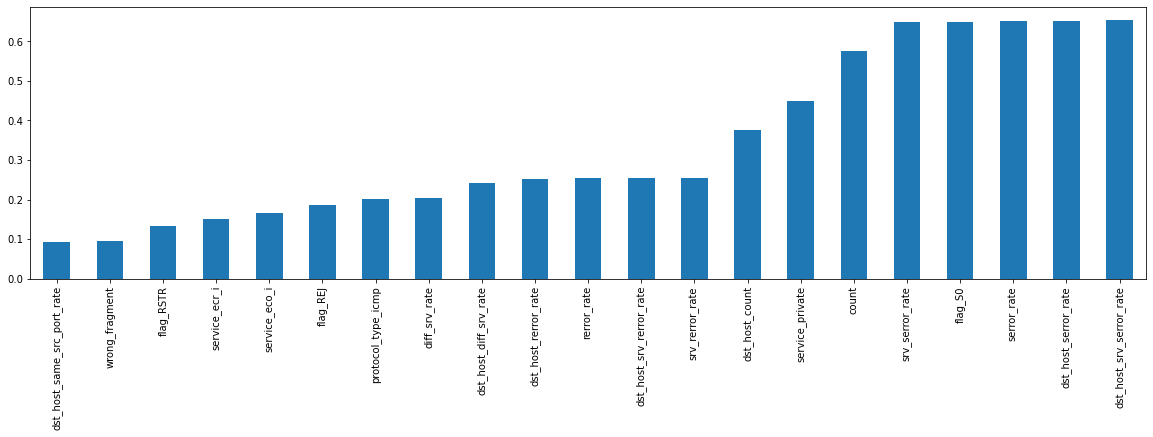

In [61]:
plt.figure(figsize=(20,5))
train_data.corr()["target"].sort_values()[100:-1].plot(kind='bar')